In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
%matplotlib inline
import missingno as msno
import plotly.graph_objects as go

### Dataset loading for visualisation

In [12]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
df_covid_data=pd.read_csv(url, sep=',')

In [13]:
df_covid_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
df_covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [15]:
len(df_covid_data)

197465

In [16]:
df_covid_data.to_csv('../data/raw/covid_full_data_ourworldindata.csv')

In [17]:
len(df_covid_data['location'].unique())

244

In [18]:
df_covid_data['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [19]:
#df_germany_data = df_covid_data[df_covid_data['location']=='Germany']
#df_india_data = df_covid_data[df_covid_data['location']=='India']
#df_sweden_data = df_covid_data[df_covid_data['location']=='Sweden']
        
#df_germany_data = df_germany_data.reset_index(drop=True)
#df_india_data = df_india_data.reset_index(drop=True)
#df_sweden_data = df_sweden_data.reset_index(drop=True)

#df_germany_data.loc[:, ('total_cases_per_population')] = df_germany_data.loc[:, ('total_cases')]/df_germany_data.loc[:,('population')]
#df_india_data.loc[:, ('total_cases_per_population')] = df_india_data.loc[:, ('total_cases')]/df_india_data.loc[:,('population')]
#df_sweden_data.loc[:, ('total_cases_per_population')] = df_sweden_data.loc[:, ('total_cases')]/df_sweden_data.loc[:,('population')]

In [20]:
country_array = ['Germany', 'India', 'Sweden']
color_array = ['green', 'blue', 'yellow']
df_dict = {}
least_count = 20000

for country, clr in zip(country_array, color_array):
    print(clr)
    df_dict[country] = df_covid_data[df_covid_data['location']==country]
    df_dict[country] = df_dict[country].reset_index(drop=True)
    df_dict[country].loc[:, ('total_cases_per_population')] = df_dict[country].loc[:, ('total_cases')]/df_dict[country].loc[:,('population')]
    df_dict[country].loc[:, ('plot_color')] = clr
    if least_count > len(df_dict[country]):
        least_count = len(df_dict[country])
        
print("Total number of days data - ",least_count)

#making all dataframes of same length
for country in country_array:
    if len(df_dict[country]) > least_count:
        remove_rows = len(df_dict[country]) - least_count
        print(remove_rows)
        df_dict[country] = df_dict[country][remove_rows:]
    


for i, country in enumerate(country_array):
    if i ==0:
        final_df = pd.DataFrame({'date' : df_dict[country]['date']})
    final_df[country] = df_dict[country]['total_cases_per_population']  
print(final_df)

green
blue
yellow
Total number of days data -  879
5
2
           date       Germany         India        Sweden
5    2020-02-01  9.535107e-08  2.152993e-09  9.842366e-08
6    2020-02-02  1.191888e-07  2.152993e-09  9.842366e-08
7    2020-02-03  1.430266e-07  2.152993e-09  9.842366e-08
8    2020-02-04  1.430266e-07  2.152993e-09  9.842366e-08
9    2020-02-05  1.430266e-07  2.152993e-09  9.842366e-08
..          ...           ...           ...           ...
879  2022-06-24  3.310007e-01  3.116015e-02           NaN
880  2022-06-25  3.310007e-01  3.117056e-02           NaN
881  2022-06-26  3.310102e-01           NaN           NaN
882  2022-06-27  3.327066e-01           NaN           NaN
883  2022-06-28  3.343031e-01           NaN           NaN

[879 rows x 4 columns]


In [21]:
#for country in country_array:
#    print(len(df_dict[country]))
#    print(df_dict[country]['date'])
#    print(df_dict[country]['total_cases_per_population'])

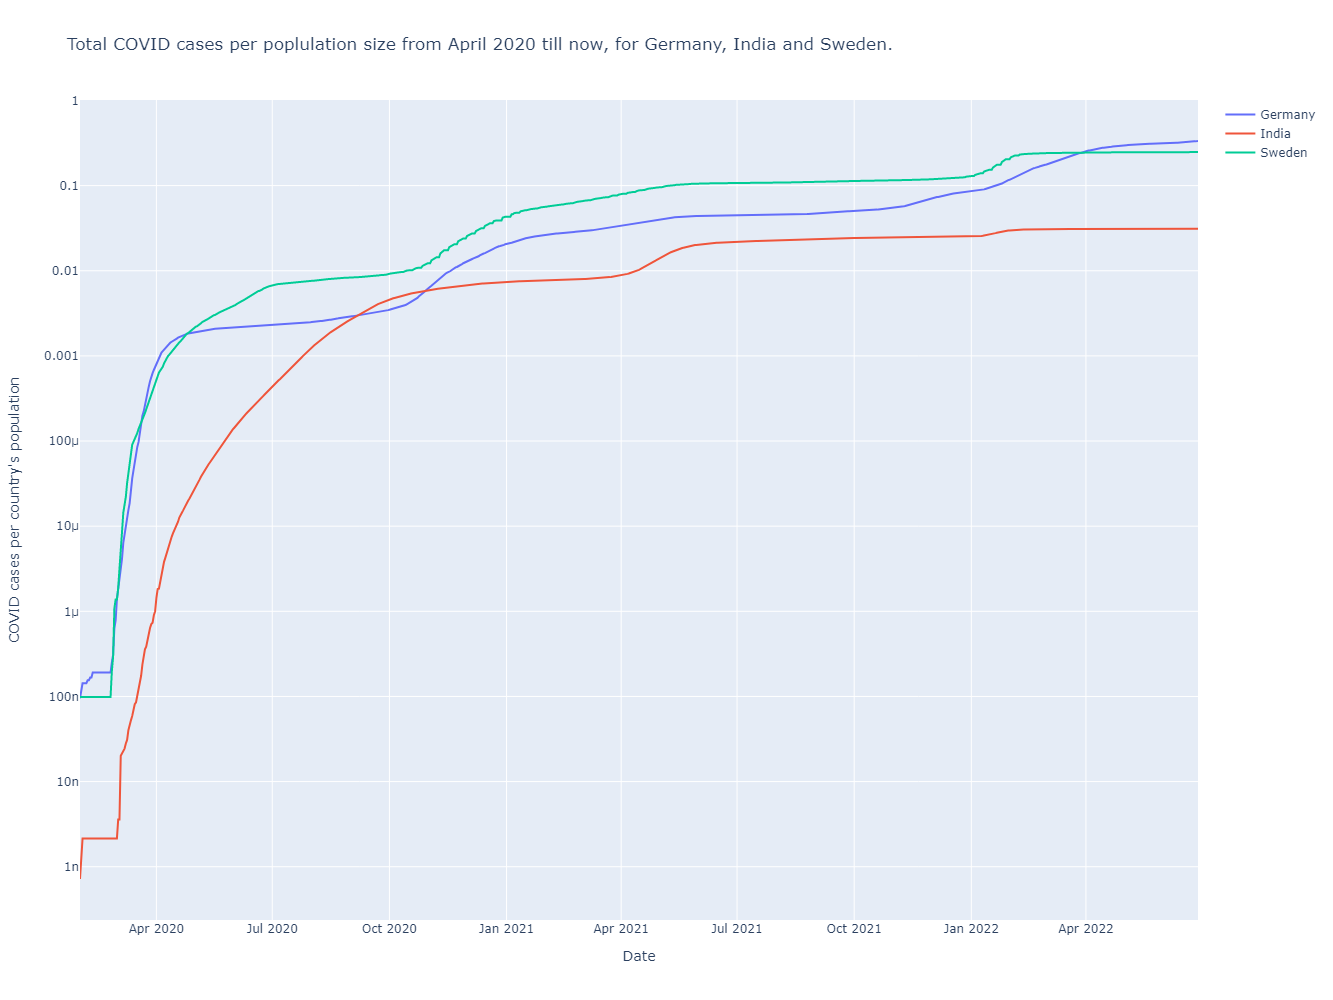

In [24]:
fig = go.Figure()
for country in country_array:
    fig.add_trace(go.Scatter(x=df_dict[country]['date'], y=df_dict[country]['total_cases_per_population'], name=country, mode="lines"))       
    #fig.add_trace(go.Scatter(x=final_df['date'], y=final_df[country], name=country, mode="lines"))       

fig.update_yaxes(type="log")
fig.update_layout(width = 1200, height=1000, title="Total COVID cases per poplulation size from April 2020 till now, for Germany, India and Sweden.", xaxis_title="Date", yaxis_title="COVID cases per country's population")
fig.show()    
fig.write_image("../reports/figures/delivery1_log_results.jpeg")

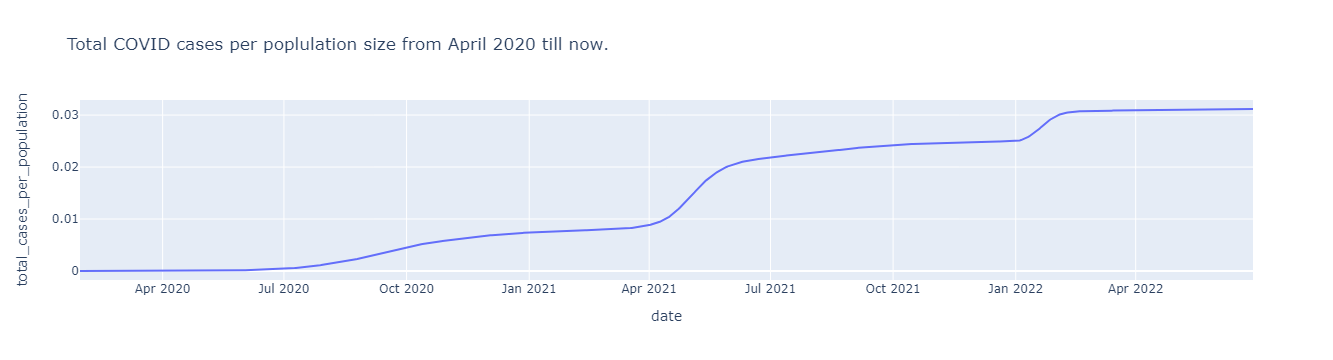

In [65]:


fig=px.line(df_germany_data, x='date', y='total_cases_per_population', title="Total COVID cases per poplulation size from April 2020 till now.")
fig=px.line(df_india_data, x='date', y='total_cases_per_population', title="Total COVID cases per poplulation size from April 2020 till now.")
fig.show()

In [14]:
(df_germany['total_cases']/df_germany['population'])*100

0       0.000001
1       0.000005
2       0.000005
3       0.000005
4       0.000006
         ...    
874    32.433544
875    32.580262
876    32.722373
877    32.864637
878    32.993587
Length: 879, dtype: float64

In [23]:
df_germany = df_country[df_country['location']=='Germany']
df_US = df_country[df_country['location']=='United States']
b_all= df_germany or df_US

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().